In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models

In [2]:
IMAGE_SIZE = 256
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/Users/dhruvrao/Desktop/Dog Breed Classification/dataset',
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 967 files belonging to 10 classes.


In [3]:
class_names = dataset.class_names
class_names

['Beagle',
 'Boxer',
 'Bulldog',
 'Dachshund',
 'German_Shepherd',
 'Golden_Retriever',
 'Labrador_Retriever',
 'Poodle',
 'Rottweiler',
 'Yorkshire_Terrier']

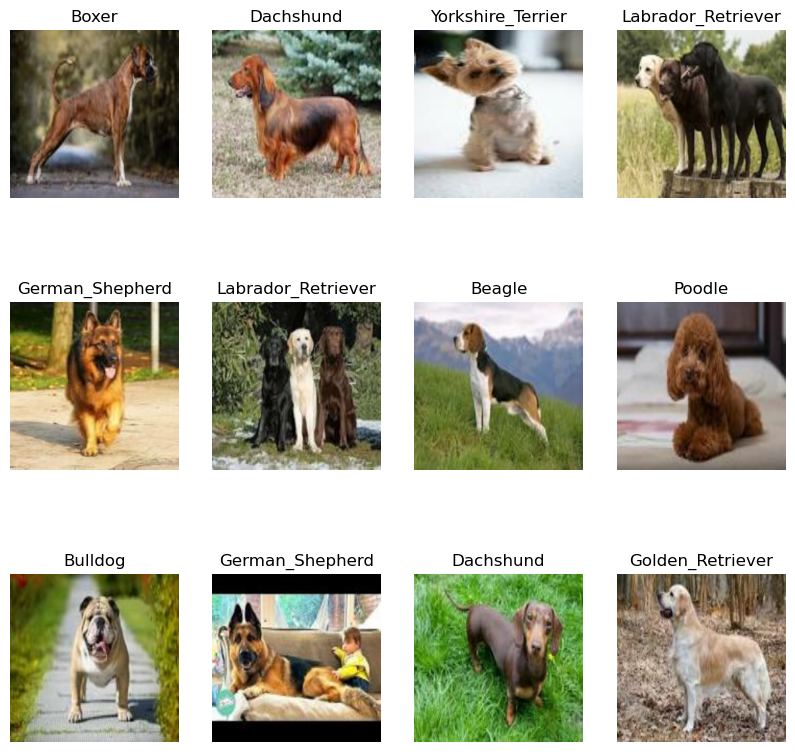

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [5]:
ds_size = len(dataset)

train_split=0.8
val_split=0.1
test_split=0.1

train_size = int(train_split * ds_size)
val_size = int(val_split * ds_size)
    
train_ds = dataset.take(train_size)    
val_ds = dataset.skip(train_size).take(val_size)
test_ds = dataset.skip(train_size).skip(val_size)

In [6]:
len(train_ds)

24

In [7]:
len(val_ds)

3

In [8]:
len(test_ds)

4

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [12]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
24/24 [==============================] - 16s 627ms/step - loss: 2.3067 - accuracy: 0.1029 - val_loss: 2.3006 - val_accuracy: 0.0833
Epoch 2/50
24/24 [==============================] - 21s 889ms/step - loss: 2.3016 - accuracy: 0.1055 - val_loss: 2.2988 - val_accuracy: 0.1250
Epoch 3/50
24/24 [==============================] - 19s 756ms/step - loss: 2.2962 - accuracy: 0.1159 - val_loss: 2.2957 - val_accuracy: 0.1042
Epoch 4/50
24/24 [==============================] - 15s 624ms/step - loss: 2.2649 - accuracy: 0.1419 - val_loss: 2.2154 - val_accuracy: 0.1458
Epoch 5/50
24/24 [==============================] - 15s 611ms/step - loss: 2.1700 - accuracy: 0.1810 - val_loss: 2.1733 - val_accuracy: 0.1875
Epoch 6/50
24/24 [==============================] - 15s 640ms/step - loss: 2.1139 - accuracy: 0.2018 - val_loss: 2.1461 - val_accuracy: 0.1875
Epoch 7/50
24/24 [==============================] - 16s 675ms/step - loss: 2.0557 - accuracy: 0.2214 - val_loss: 2.0267 - val_accuracy: 0.2708

In [17]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 1s 178ms/step - loss: 0.2569 - accuracy: 0.9515


In [18]:
scores

[0.25685787200927734, 0.9514563083648682]

first image to predict
actual label: Labrador_Retriever
1/1 [==============================] - 0s 339ms/step
predicted label: Labrador_Retriever


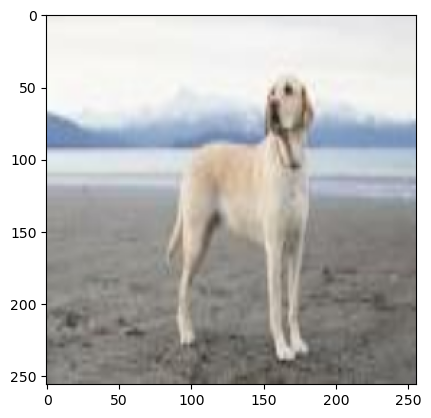

In [19]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [20]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


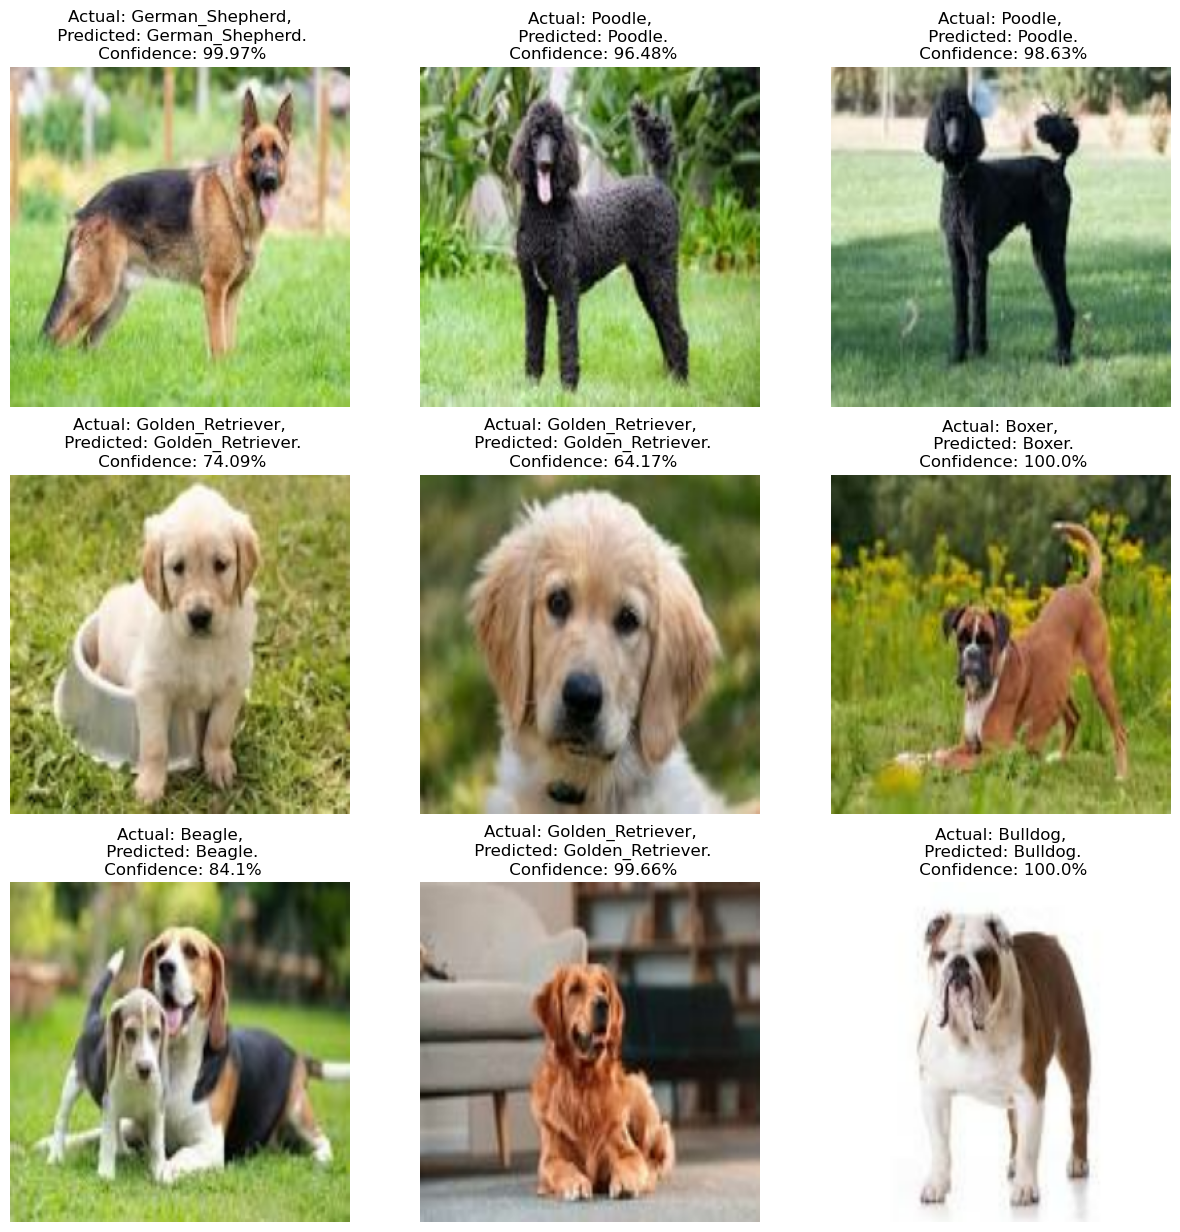

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")